In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

In [ ]:
df_train = pd.read_csv('/content/disp_st6ns1.txt')
df_train.head(3650)

,Unnamed: 0,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
0,V1,0.000000,0.000000,0.000000,0.000000,0.0,234.401764,229.968914,234.719940,254.104944,...,233.140839,237.578452,256.342403,245.431481,0,4.000000,41.636364,104.454545,71.636364,10116900
1,V2,0.000000,0.000909,0.127273,0.000909,0.0,276.634960,272.369578,268.436640,256.169015,...,226.094627,230.027276,248.015693,252.598371,0,3.818182,33.545455,99.272727,71.818182,9262800
2,V3,0.000000,0.000000,0.000000,0.000000,0.0,218.280002,218.450567,226.860365,255.074577,...,228.465100,233.935296,255.359149,253.256739,0,4.000000,41.727273,105.000000,73.636364,10789800
3,V4,0.000000,0.000000,0.000000,0.000000,0.0,232.681230,208.987453,213.493584,236.729101,...,234.644049,238.489481,255.291218,249.140133,0,4.000000,44.000000,108.090909,74.909091,11816700
4,V5,0.000000,0.000000,0.000000,0.000000,0.0,248.980929,251.472505,259.123549,288.395427,...,232.706659,236.589168,252.491824,254.837047,0,3.818182,39.454545,99.727273,70.545455,9936300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,V3646,0.000000,0.000000,0.000000,0.000000,0.0,231.796958,236.719546,240.650009,261.715942,...,232.304894,241.181094,265.859258,254.371199,0,4.090909,43.181818,106.454545,72.000000,10952700
3646,V3647,0.000000,0.000000,0.000000,0.000000,0.0,263.127403,266.242548,275.358734,284.250483,...,204.906038,198.798526,269.984342,273.098791,0,2.363636,31.090909,103.727273,72.545455,10746900
3647,V3648,0.000000,0.000000,0.000000,0.000000,0.0,238.255640,217.622285,219.856505,232.946272,...,248.021443,254.283820,272.725098,266.931355,0,5.000000,46.000000,112.181818,78.000000,11491500
3648,V3649,0.000000,0.000000,0.000000,0.000000,0.0,205.251068,201.503141,205.880766,224.400191,...,233.666641,239.476782,258.692466,254.436306,0,5.000000,45.454545,110.181818,76.636364,11340600


In [ ]:
df_train.columns

Index(['Unnamed: 0', 'apcp_sf1_1', 'apcp_sf2_1', 'apcp_sf3_1', 'apcp_sf4_1',
       'apcp_sf5_1', 'dlwrf_s1_1', 'dlwrf_s2_1', 'dlwrf_s3_1', 'dlwrf_s4_1',
       'dlwrf_s5_1', 'dswrf_s1_1', 'dswrf_s2_1', 'dswrf_s3_1', 'dswrf_s4_1',
       'dswrf_s5_1', 'pres_ms1_1', 'pres_ms2_1', 'pres_ms3_1', 'pres_ms4_1',
       'pres_ms5_1', 'pwat_ea1_1', 'pwat_ea2_1', 'pwat_ea3_1', 'pwat_ea4_1',
       'pwat_ea5_1', 'spfh_2m1_1', 'spfh_2m2_1', 'spfh_2m3_1', 'spfh_2m4_1',
       'spfh_2m5_1', 'tcdc_ea1_1', 'tcdc_ea2_1', 'tcdc_ea3_1', 'tcdc_ea4_1',
       'tcdc_ea5_1', 'tcolc_e1_1', 'tcolc_e2_1', 'tcolc_e3_1', 'tcolc_e4_1',
       'tcolc_e5_1', 'tmax_2m1_1', 'tmax_2m2_1', 'tmax_2m3_1', 'tmax_2m4_1',
       'tmax_2m5_1', 'tmin_2m1_1', 'tmin_2m2_1', 'tmin_2m3_1', 'tmin_2m4_1',
       'tmin_2m5_1', 'tmp_2m_1_1', 'tmp_2m_2_1', 'tmp_2m_3_1', 'tmp_2m_4_1',
       'tmp_2m_5_1', 'tmp_sfc1_1', 'tmp_sfc2_1', 'tmp_sfc3_1', 'tmp_sfc4_1',
       'tmp_sfc5_1', 'ulwrf_s1_1', 'ulwrf_s2_1', 'ulwrf_s3_1', 'ulwrf_s4_1',

Como parte de este proyecto, se nos pide realizar un estudio sobre la correlación que existe entre las variable proporcionadas y la varible 'salida' cuyo valor numerico se proporciona tan solo para los 10 primeros años de estudio, para nosotros hallar la funcion que, a partir de las otras variables, predice un valor aproximado para salida, y probrar dicha funcion en los 2 años de estudio restantes.
Por ello, de momento nos vamos a fijar unicamente en la variable 'salida', ya que es la variable objetivo de nuestros datos.

In [ ]:
df_train['salida'].describe()

count    4.380000e+03
mean     1.749081e+07
std      7.945135e+06
min      3.000000e+02
25%      1.135185e+07
50%      1.741605e+07
75%      2.459130e+07
max      3.225630e+07
Name: salida, dtype: float64

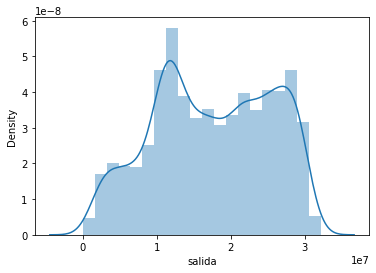

In [ ]:
sns.distplot(df_train['salida']);

A simple vista podemos observar que hay una desviacion en relaciona a una distribucion normal. Tambien observamos que hay dos picos

In [ ]:
# Asimetría y curtosis:

print("Skewness: %f" % df_train['salida'].skew())
print("Kurtosis: %f" % df_train['salida'].kurt())

Skewness: -0.125917
Kurtosis: -1.054102


Ahora vamos a estudiar la relacion de 'salida' con las otras variables proporcionadas. Tras entender lo que significa cada una de ellas y que cada una corresponde a una hora del día distinta, creemos que las variables que más influyen sobre el resultado de 'salida' son dswrf_sfc ya que se trata de la media del flujo radiativo de onda corta que llega desde el cielo a la sufercifie(descendiente), es decir, en donde se encuentran las plantas energéticas, ya que la radiacion de onda corta contiene un nivel más alto de energía que la de onda larga, y por lo tanto influye en mayor medida en 'salida'. En cuanto a la hora, creemos que el que más influye sería aquellas horas que corresponden a la tarde, pues es cuando la temperatura suele ser la más alta (2 y 3 correspondientes a las 15h y 18h).

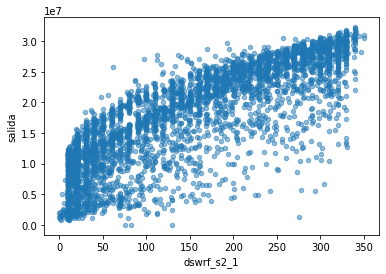

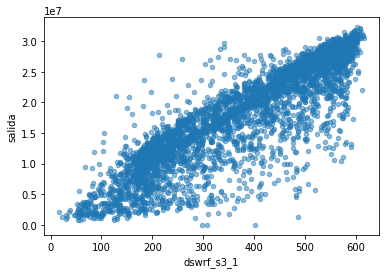

In [ ]:
var1 = 'dswrf_s2_1'
var2 = 'dswrf_s3_1'
data = pd.concat([df_train['salida'], df_train[var1]], axis=1)
data.plot.scatter(x=var1, y='salida', alpha = 0.5);

data = pd.concat([df_train['salida'], df_train[var2]], axis=1)
data.plot.scatter(x=var2, y='salida', alpha = 0.5);

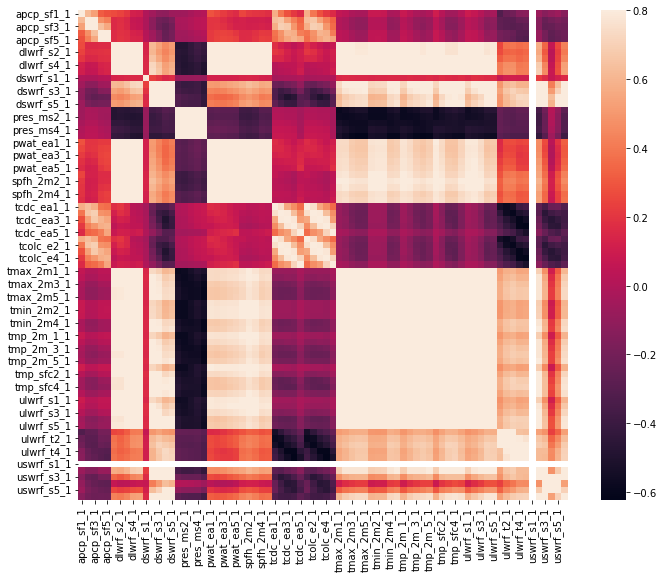

In [ ]:
# Matriz de correlación:

corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
corr = df_train.corr()
corr[['salida']].sort_values(by = 'salida',ascending = False).style.background_gradient()

,salida
salida,1.000000
dswrf_s3_1,0.877270
dswrf_s5_1,0.876034
dswrf_s4_1,0.873229
uswrf_s2_1,0.842086
dswrf_s2_1,0.829018
uswrf_s3_1,0.798940
ulwrf_s5_1,0.778697
tmp_sfc4_1,0.777438
ulwrf_s4_1,0.775706


En las matrices de correlacion se puede observar lo siguiente:
1. Las variables dswrf_sfc son las que más correlacion tienen con la varible 'salida' y se corresponden a la media de radiación de onda corta que llega del cielo en la superficie, más especificamente a las horas 2,3,4,5 (12h, 15h, 18h y 24h respectivamente)
2. Las variables uswrf_sfc que corresponde a la radiacion de onda corta que procede del suelo sobre la superficie a las horas 2 y 3 también tienen un alto nivel de correlación.
3. A la hora 5, la variable ulwrf_sfc que corresponde a la radiacion de onda larga que procede del suelo sobre la superficie tiene alta correlacion con salída.
4. 